# Lecture 5: Linear regression, optimization, and symbolic mathematics 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import scipy.interpolate as spi
import scipy.optimize as spo


%matplotlib inline

## Function approximation

### Regression

In [2]:
def f(x): # DGP (data generating process)
    return np.sin(x)+0.5*x

Text(0,0.5,'f(x)')

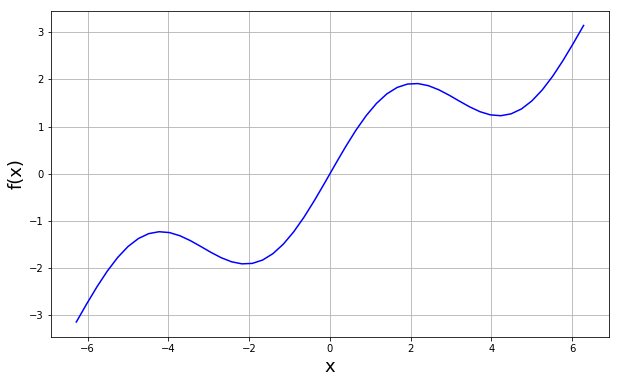

In [3]:
x=np.linspace(-2*np.pi, 2*np.pi, 50) # space for x-axis

# Plot the function
plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

Given $N$ points $\left(x_j, y_j\right)$, you choose $K$ base functions $b_i\left(x_j\right)$ such that $y_j$ can be written as a linear combination of such functions. Then one optimizes the coefficients:
$$ \min_{\alpha_i} \frac{1}{N} \sum_{j=1}^N \left(y_j-\sum_{i=1}^K \alpha_i b_i\left(x_j\right)\right)^2 $$

#### Polynomials

Text(0,0.5,'f(x)')

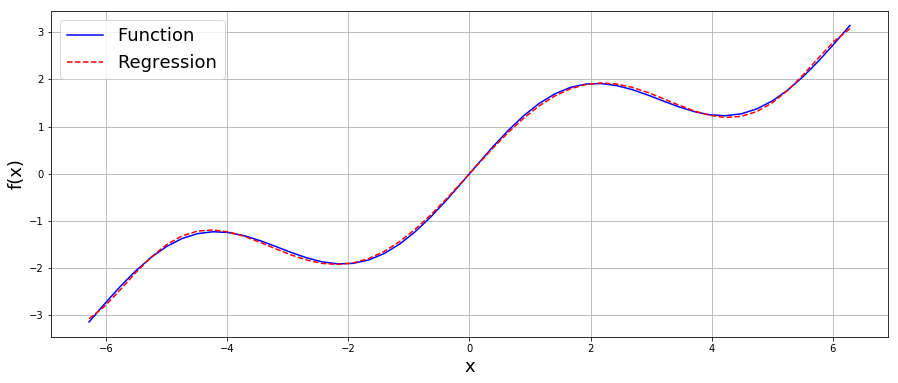

In [9]:
deg = 8 # polynomial degree

reg = np.polyfit(x, f(x), deg)
y_fit = np.polyval(reg,x)

plt.figure(figsize=(15,6))

plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_fit, 'r', ls='--', label='Regression')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [5]:
# Root mean squared error
np.sqrt(np.mean((f(x)-y_fit)**2))

0.04215345153070822

#### Beyond polynomials

In [6]:
# Choose basis functions
matrix = np.zeros((len(x), 5))
matrix[:,0] = 1
matrix[:,1] = x
matrix[:,2] = x**2
matrix[:,3] = np.sin(x)
matrix[:,4] = np.cos(x)

In [7]:
reg = np.linalg.lstsq(matrix, f(x), rcond=None)[0] # compute the coefficients
y_fit2 = np.dot(reg, matrix.T) # compute the fitted values

Text(0,0.5,'f(x)')

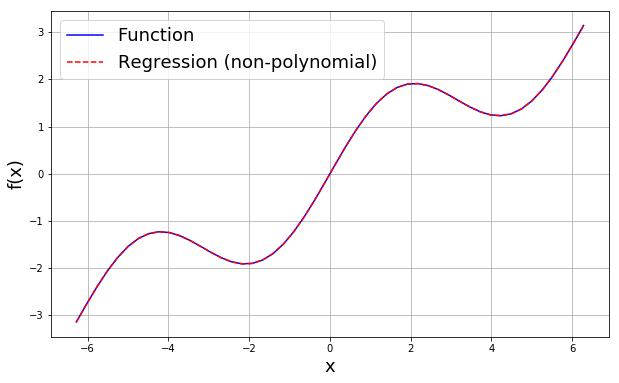

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_fit2, 'r', ls='--', label='Regression (non-polynomial)')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [9]:
# Root mean squared error
np.sqrt(np.mean((f(x)-y_fit2)**2))

1.1540046059289931e-15

### Interpolation

Text(0,0.5,'f(x)')

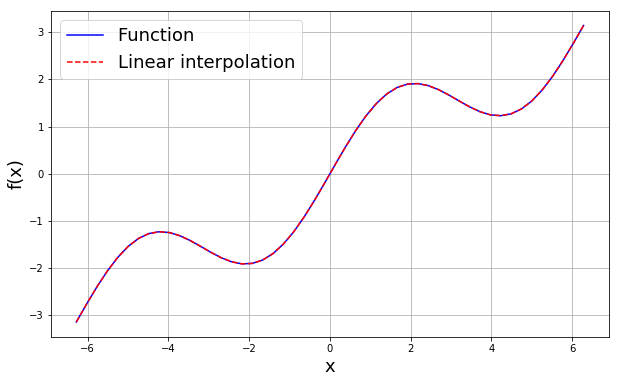

In [10]:
ipo = spi.splrep(x,f(x), k=1)
y_interp = spi.splev(x,ipo)

plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_interp, 'r', ls='--', label='Linear interpolation')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [11]:
#ipo # what object is this?

## Convex optimization

In [12]:
def fm(pair):
    x, y = pair
    z = np.sin(x) + 1/20.0*x**2 + np.sin(y) + 1/20.0*y**2
    # print "%8.4f %8.4f %8.4f" % (x,y,z)
    return z

Text(0.5,0,'f(x,y)')

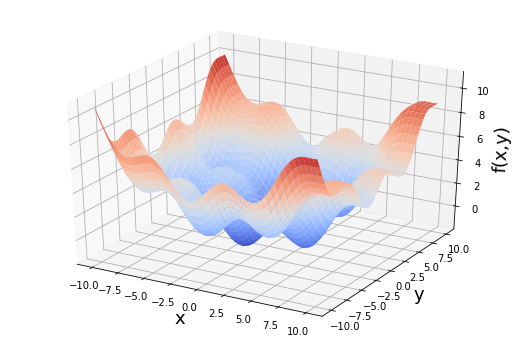

In [13]:
# Plot the function
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

X,Y = np.meshgrid(x,y)

Z = fm((X,Y))

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z,cmap=mpl.cm.coolwarm)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('f(x,y)',fontsize=18)

### Brute force optimization

In [10]:
import scipy.optimize as spo
search_area = (-10, 10.01, 0.1)

def fm1(pair):
    x, y = pair
    z = np.sin(x) + 1/20.0*x**2 + np.sin(y) + 1/20.0*y**2
    print("{0:8.4f} {1:8.4f} {2:8.4f}".format(x,y,z))
    return z

min_1 = spo.brute(fm1, (search_area, search_area), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -9.9000  10.9021
-10.0000  -9.8000  10.7125
-10.0000  -9.7000  10.5203
-10.0000  -9.6000  10.3263
-10.0000  -9.5000  10.1317
-10.0000  -9.4000   9.9372
-10.0000  -9.3000   9.7441
-10.0000  -9.2000   9.5531
-10.0000  -9.1000   9.3654
-10.0000  -9.0000   9.1819
-10.0000  -8.9000   9.0035
-10.0000  -8.8000   8.8311
-10.0000  -8.7000   8.6656
-10.0000  -8.6000   8.5076
-10.0000  -8.5000   8.3580
-10.0000  -8.4000   8.2174
-10.0000  -8.3000   8.0863
-10.0000  -8.2000   7.9653
-10.0000  -8.1000   7.8546
-10.0000  -8.0000   7.7547
-10.0000  -7.9000   7.6656
-10.0000  -7.8000   7.5875
-10.0000  -7.7000   7.5204
-10.0000  -7.6000   7.4641
-10.0000  -7.5000   7.4185
-10.0000  -7.4000   7.3833
-10.0000  -7.3000   7.3581
-10.0000  -7.2000   7.3424
-10.0000  -7.1000   7.3356
-10.0000  -7.0000   7.3370
-10.0000  -6.9000   7.3461
-10.0000  -6.8000   7.3619
-10.0000  -6.7000   7.3837
-10.0000  -6.6000   7.4105
-10.0000  -6.5000   7.4414
-

 -8.7000  -2.8000   3.1785
 -8.7000  -2.7000   3.0587
 -8.7000  -2.6000   2.9440
 -8.7000  -2.5000   2.8356
 -8.7000  -2.4000   2.7341
 -8.7000  -2.3000   2.6403
 -8.7000  -2.2000   2.5550
 -8.7000  -2.1000   2.4788
 -8.7000  -2.0000   2.4122
 -8.7000  -1.9000   2.3557
 -8.7000  -1.8000   2.3097
 -8.7000  -1.7000   2.2744
 -8.7000  -1.6000   2.2500
 -8.7000  -1.5000   2.2365
 -8.7000  -1.4000   2.2341
 -8.7000  -1.3000   2.2425
 -8.7000  -1.2000   2.2615
 -8.7000  -1.1000   2.2908
 -8.7000  -1.0000   2.3301
 -8.7000  -0.9000   2.3787
 -8.7000  -0.8000   2.4362
 -8.7000  -0.7000   2.5018
 -8.7000  -0.6000   2.5749
 -8.7000  -0.5000   2.6546
 -8.7000  -0.4000   2.7401
 -8.7000  -0.3000   2.8305
 -8.7000  -0.2000   2.9249
 -8.7000  -0.1000   3.0222
 -8.7000   0.0000   3.1215
 -8.7000   0.1000   3.2219
 -8.7000   0.2000   3.3222
 -8.7000   0.3000   3.4216
 -8.7000   0.4000   3.5189
 -8.7000   0.5000   3.6135
 -8.7000   0.6000   3.7042
 -8.7000   0.7000   3.7902
 -8.7000   0.8000   3.8709
 

 -7.9000   7.8000   6.1621
 -7.9000   7.9000   6.2410
 -7.9000   8.0000   6.3109
 -7.9000   8.1000   6.3719
 -7.9000   8.2000   6.4243
 -7.9000   8.3000   6.4682
 -7.9000   8.4000   6.5042
 -7.9000   8.5000   6.5325
 -7.9000   8.6000   6.5540
 -7.9000   8.7000   6.5690
 -7.9000   8.8000   6.5785
 -7.9000   8.9000   6.5831
 -7.9000   9.0000   6.5837
 -7.9000   9.1000   6.5812
 -7.9000   9.2000   6.5764
 -7.9000   9.3000   6.5705
 -7.9000   9.4000   6.5643
 -7.9000   9.5000   6.5589
 -7.9000   9.6000   6.5552
 -7.9000   9.7000   6.5543
 -7.9000   9.8000   6.5571
 -7.9000   9.9000   6.5645
 -7.9000  10.0000   6.5775
 -7.8000 -10.0000   7.5875
 -7.8000  -9.9000   7.4015
 -7.8000  -9.8000   7.2119
 -7.8000  -9.7000   7.0197
 -7.8000  -9.6000   6.8258
 -7.8000  -9.5000   6.6311
 -7.8000  -9.4000   6.4367
 -7.8000  -9.3000   6.2435
 -7.8000  -9.2000   6.0526
 -7.8000  -9.1000   5.8649
 -7.8000  -9.0000   5.6813
 -7.8000  -8.9000   5.5029
 -7.8000  -8.8000   5.3305
 -7.8000  -8.7000   5.1650
 

 -6.6000  -3.5000   2.8297
 -6.6000  -3.4000   2.7000
 -6.6000  -3.3000   2.5687
 -6.6000  -3.2000   2.4368
 -6.6000  -3.1000   2.3054
 -6.6000  -3.0000   2.1753
 -6.6000  -2.9000   2.0477
 -6.6000  -2.8000   1.9235
 -6.6000  -2.7000   1.8036
 -6.6000  -2.6000   1.6890
 -6.6000  -2.5000   1.5805
 -6.6000  -2.4000   1.4790
 -6.6000  -2.3000   1.3853
 -6.6000  -2.2000   1.3000
 -6.6000  -2.1000   1.2237
 -6.6000  -2.0000   1.1572
 -6.6000  -1.9000   1.1007
 -6.6000  -1.8000   1.0546
 -6.6000  -1.7000   1.0193
 -6.6000  -1.6000   0.9949
 -6.6000  -1.5000   0.9815
 -6.6000  -1.4000   0.9790
 -6.6000  -1.3000   0.9874
 -6.6000  -1.2000   1.0064
 -6.6000  -1.1000   1.0358
 -6.6000  -1.0000   1.0750
 -6.6000  -0.9000   1.1236
 -6.6000  -0.8000   1.1811
 -6.6000  -0.7000   1.2467
 -6.6000  -0.6000   1.3198
 -6.6000  -0.5000   1.3995
 -6.6000  -0.4000   1.4850
 -6.6000  -0.3000   1.5754
 -6.6000  -0.2000   1.6698
 -6.6000  -0.1000   1.7671
 -6.6000   0.0000   1.8665
 -6.6000   0.1000   1.9668
 

 -5.4000   5.2000   2.6993
 -5.4000   5.3000   2.8030
 -5.4000   5.4000   2.9160
 -5.4000   5.5000   3.0377
 -5.4000   5.6000   3.1675
 -5.4000   5.7000   3.3046
 -5.4000   5.8000   3.4482
 -5.4000   5.9000   3.5974
 -5.4000   6.0000   3.7513
 -5.4000   6.1000   3.9091
 -5.4000   6.2000   4.0697
 -5.4000   6.3000   4.2321
 -5.4000   6.4000   4.3953
 -5.4000   6.5000   4.5584
 -5.4000   6.6000   4.7203
 -5.4000   6.7000   4.8801
 -5.4000   6.8000   5.0369
 -5.4000   6.9000   5.1897
 -5.4000   7.0000   5.3378
 -5.4000   7.1000   5.4802
 -5.4000   7.2000   5.6164
 -5.4000   7.3000   5.7457
 -5.4000   7.4000   5.8675
 -5.4000   7.5000   5.9813
 -5.4000   7.6000   6.0867
 -5.4000   7.7000   6.1834
 -5.4000   7.8000   6.2713
 -5.4000   7.9000   6.3502
 -5.4000   8.0000   6.4201
 -5.4000   8.1000   6.4812
 -5.4000   8.2000   6.5335
 -5.4000   8.3000   6.5774
 -5.4000   8.4000   6.6134
 -5.4000   8.5000   6.6418
 -5.4000   8.6000   6.6632
 -5.4000   8.7000   6.6782
 -5.4000   8.8000   6.6877
 

 -4.1000  -6.1000   3.7014
 -4.1000  -6.0000   3.7382
 -4.1000  -5.9000   3.7732
 -4.1000  -5.8000   3.8054
 -4.1000  -5.7000   3.8340
 -4.1000  -5.6000   3.8580
 -4.1000  -5.5000   3.8768
 -4.1000  -5.4000   3.8895
 -4.1000  -5.3000   3.8955
 -4.1000  -5.2000   3.8942
 -4.1000  -5.1000   3.8851
 -4.1000  -5.0000   3.8677
 -4.1000  -4.9000   3.8417
 -4.1000  -4.8000   3.8069
 -4.1000  -4.7000   3.7632
 -4.1000  -4.6000   3.7105
 -4.1000  -4.5000   3.6488
 -4.1000  -4.4000   3.5784
 -4.1000  -4.3000   3.4994
 -4.1000  -4.2000   3.4124
 -4.1000  -4.1000   3.3176
 -4.1000  -4.0000   3.2156
 -4.1000  -3.9000   3.1070
 -4.1000  -3.8000   2.9926
 -4.1000  -3.7000   2.8731
 -4.1000  -3.6000   2.7493
 -4.1000  -3.5000   2.6221
 -4.1000  -3.4000   2.4923
 -4.1000  -3.3000   2.3610
 -4.1000  -3.2000   2.2292
 -4.1000  -3.1000   2.0977
 -4.1000  -3.0000   1.9677
 -4.1000  -2.9000   1.8400
 -4.1000  -2.8000   1.7158
 -4.1000  -2.7000   1.5959
 -4.1000  -2.6000   1.4813
 -4.1000  -2.5000   1.3728
 

 -3.1000  -7.2000   2.2373
 -3.1000  -7.1000   2.2305
 -3.1000  -7.0000   2.2319
 -3.1000  -6.9000   2.2410
 -3.1000  -6.8000   2.2568
 -3.1000  -6.7000   2.2786
 -3.1000  -6.6000   2.3054
 -3.1000  -6.5000   2.3363
 -3.1000  -6.4000   2.3704
 -3.1000  -6.3000   2.4066
 -3.1000  -6.2000   2.4440
 -3.1000  -6.1000   2.4816
 -3.1000  -6.0000   2.5183
 -3.1000  -5.9000   2.5533
 -3.1000  -5.8000   2.5855
 -3.1000  -5.7000   2.6141
 -3.1000  -5.6000   2.6382
 -3.1000  -5.5000   2.6570
 -3.1000  -5.4000   2.6697
 -3.1000  -5.3000   2.6757
 -3.1000  -5.2000   2.6744
 -3.1000  -5.1000   2.6652
 -3.1000  -5.0000   2.6478
 -3.1000  -4.9000   2.6219
 -3.1000  -4.8000   2.5871
 -3.1000  -4.7000   2.5433
 -3.1000  -4.6000   2.4906
 -3.1000  -4.5000   2.4289
 -3.1000  -4.4000   2.3585
 -3.1000  -4.3000   2.2796
 -3.1000  -4.2000   2.1925
 -3.1000  -4.1000   2.0977
 -3.1000  -4.0000   1.9957
 -3.1000  -3.9000   1.8872
 -3.1000  -3.8000   1.7728
 -3.1000  -3.7000   1.6533
 -3.1000  -3.6000   1.5294
 

 -2.0000   6.6000   1.7802
 -2.0000   6.7000   1.9401
 -2.0000   6.8000   2.0968
 -2.0000   6.9000   2.2496
 -2.0000   7.0000   2.3977
 -2.0000   7.1000   2.5402
 -2.0000   7.2000   2.6764
 -2.0000   7.3000   2.8056
 -2.0000   7.4000   2.9274
 -2.0000   7.5000   3.0412
 -2.0000   7.6000   3.1466
 -2.0000   7.7000   3.2434
 -2.0000   7.8000   3.3312
 -2.0000   7.9000   3.4101
 -2.0000   8.0000   3.4801
 -2.0000   8.1000   3.5411
 -2.0000   8.2000   3.5934
 -2.0000   8.3000   3.6374
 -2.0000   8.4000   3.6733
 -2.0000   8.5000   3.7017
 -2.0000   8.6000   3.7231
 -2.0000   8.7000   3.7382
 -2.0000   8.8000   3.7476
 -2.0000   8.9000   3.7522
 -2.0000   9.0000   3.7528
 -2.0000   9.1000   3.7503
 -2.0000   9.2000   3.7456
 -2.0000   9.3000   3.7397
 -2.0000   9.4000   3.7335
 -2.0000   9.5000   3.7281
 -2.0000   9.6000   3.7244
 -2.0000   9.7000   3.7234
 -2.0000   9.8000   3.7262
 -2.0000   9.9000   3.7337
 -2.0000  10.0000   3.7467
 -1.9000 -10.0000   4.7782
 -1.9000  -9.9000   4.5922
 

 -0.9000   0.5000  -0.2509
 -0.9000   0.6000  -0.1602
 -0.9000   0.7000  -0.0741
 -0.9000   0.8000   0.0065
 -0.9000   0.9000   0.0810
 -0.9000   1.0000   0.1486
 -0.9000   1.1000   0.2089
 -0.9000   1.2000   0.2612
 -0.9000   1.3000   0.3052
 -0.9000   1.4000   0.3406
 -0.9000   1.5000   0.3672
 -0.9000   1.6000   0.3847
 -0.9000   1.7000   0.3933
 -0.9000   1.8000   0.3930
 -0.9000   1.9000   0.3840
 -0.9000   2.0000   0.3665
 -0.9000   2.1000   0.3409
 -0.9000   2.2000   0.3077
 -0.9000   2.3000   0.2674
 -0.9000   2.4000   0.2206
 -0.9000   2.5000   0.1681
 -0.9000   2.6000   0.1107
 -0.9000   2.7000   0.0491
 -0.9000   2.8000  -0.0158
 -0.9000   2.9000  -0.0831
 -0.9000   3.0000  -0.1517
 -0.9000   3.1000  -0.2207
 -0.9000   3.2000  -0.2892
 -0.9000   3.3000  -0.3561
 -0.9000   3.4000  -0.4204
 -0.9000   3.5000  -0.4811
 -0.9000   3.6000  -0.5373
 -0.9000   3.7000  -0.5882
 -0.9000   3.8000  -0.6327
 -0.9000   3.9000  -0.6701
 -0.9000   4.0000  -0.6996
 -0.9000   4.1000  -0.7206
 

  0.3000  -2.6000   0.1225
  0.3000  -2.5000   0.0140
  0.3000  -2.4000  -0.0874
  0.3000  -2.3000  -0.1812
  0.3000  -2.2000  -0.2665
  0.3000  -2.1000  -0.3427
  0.3000  -2.0000  -0.4093
  0.3000  -1.9000  -0.4658
  0.3000  -1.8000  -0.5118
  0.3000  -1.7000  -0.5471
  0.3000  -1.6000  -0.5716
  0.3000  -1.5000  -0.5850
  0.3000  -1.4000  -0.5874
  0.3000  -1.3000  -0.5790
  0.3000  -1.2000  -0.5600
  0.3000  -1.1000  -0.5307
  0.3000  -1.0000  -0.4915
  0.3000  -0.9000  -0.4428
  0.3000  -0.8000  -0.3853
  0.3000  -0.7000  -0.3197
  0.3000  -0.6000  -0.2466
  0.3000  -0.5000  -0.1669
  0.3000  -0.4000  -0.0814
  0.3000  -0.3000   0.0090
  0.3000  -0.2000   0.1034
  0.3000  -0.1000   0.2007
  0.3000   0.0000   0.3000
  0.3000   0.1000   0.4004
  0.3000   0.2000   0.5007
  0.3000   0.3000   0.6000
  0.3000   0.4000   0.6974
  0.3000   0.5000   0.7919
  0.3000   0.6000   0.8827
  0.3000   0.7000   0.9687
  0.3000   0.8000   1.0494
  0.3000   0.9000   1.1238
  0.3000   1.0000   1.1915
 

  1.1000   6.5000   3.2793
  1.1000   6.6000   3.4412
  1.1000   6.7000   3.6011
  1.1000   6.8000   3.7578
  1.1000   6.9000   3.9106
  1.1000   7.0000   4.0587
  1.1000   7.1000   4.2012
  1.1000   7.2000   4.3374
  1.1000   7.3000   4.4666
  1.1000   7.4000   4.5884
  1.1000   7.5000   4.7022
  1.1000   7.6000   4.8076
  1.1000   7.7000   4.9044
  1.1000   7.8000   4.9923
  1.1000   7.9000   5.0711
  1.1000   8.0000   5.1411
  1.1000   8.1000   5.2021
  1.1000   8.2000   5.2544
  1.1000   8.3000   5.2984
  1.1000   8.4000   5.3343
  1.1000   8.5000   5.3627
  1.1000   8.6000   5.3841
  1.1000   8.7000   5.3992
  1.1000   8.8000   5.4086
  1.1000   8.9000   5.4132
  1.1000   9.0000   5.4138
  1.1000   9.1000   5.4113
  1.1000   9.2000   5.4066
  1.1000   9.3000   5.4007
  1.1000   9.4000   5.3945
  1.1000   9.5000   5.3891
  1.1000   9.6000   5.3854
  1.1000   9.7000   5.3844
  1.1000   9.8000   5.3872
  1.1000   9.9000   5.3947
  1.1000  10.0000   5.4077
  1.2000 -10.0000   6.5481
 

  2.3000   7.2000   4.3959
  2.3000   7.3000   4.5251
  2.3000   7.4000   4.6469
  2.3000   7.5000   4.7607
  2.3000   7.6000   4.8661
  2.3000   7.7000   4.9629
  2.3000   7.8000   5.0507
  2.3000   7.9000   5.1296
  2.3000   8.0000   5.1996
  2.3000   8.1000   5.2606
  2.3000   8.2000   5.3129
  2.3000   8.3000   5.3569
  2.3000   8.4000   5.3928
  2.3000   8.5000   5.4212
  2.3000   8.6000   5.4426
  2.3000   8.7000   5.4577
  2.3000   8.8000   5.4671
  2.3000   8.9000   5.4717
  2.3000   9.0000   5.4723
  2.3000   9.1000   5.4698
  2.3000   9.2000   5.4651
  2.3000   9.3000   5.4592
  2.3000   9.4000   5.4530
  2.3000   9.5000   5.4476
  2.3000   9.6000   5.4439
  2.3000   9.7000   5.4429
  2.3000   9.8000   5.4457
  2.3000   9.9000   5.4532
  2.3000  10.0000   5.4662
  2.4000 -10.0000   6.5075
  2.4000  -9.9000   6.3215
  2.4000  -9.8000   6.1319
  2.4000  -9.7000   5.9397
  2.4000  -9.6000   5.7458
  2.4000  -9.5000   5.5511
  2.4000  -9.4000   5.3567
  2.4000  -9.3000   5.1635
 

  3.3000   6.1000   2.0651
  3.3000   6.2000   2.2257
  3.3000   6.3000   2.3881
  3.3000   6.4000   2.5513
  3.3000   6.5000   2.7144
  3.3000   6.6000   2.8763
  3.3000   6.7000   3.0361
  3.3000   6.8000   3.1929
  3.3000   6.9000   3.3457
  3.3000   7.0000   3.4937
  3.3000   7.1000   3.6362
  3.3000   7.2000   3.7724
  3.3000   7.3000   3.9017
  3.3000   7.4000   4.0235
  3.3000   7.5000   4.1373
  3.3000   7.6000   4.2427
  3.3000   7.7000   4.3394
  3.3000   7.8000   4.4273
  3.3000   7.9000   4.5062
  3.3000   8.0000   4.5761
  3.3000   8.1000   4.6371
  3.3000   8.2000   4.6895
  3.3000   8.3000   4.7334
  3.3000   8.4000   4.7694
  3.3000   8.5000   4.7977
  3.3000   8.6000   4.8192
  3.3000   8.7000   4.8342
  3.3000   8.8000   4.8437
  3.3000   8.9000   4.8483
  3.3000   9.0000   4.8489
  3.3000   9.1000   4.8464
  3.3000   9.2000   4.8416
  3.3000   9.3000   4.8357
  3.3000   9.4000   4.8295
  3.3000   9.5000   4.8241
  3.3000   9.6000   4.8204
  3.3000   9.7000   4.8195
 

  4.4000   0.8000   0.7658
  4.4000   0.9000   0.8402
  4.4000   1.0000   0.9079
  4.4000   1.1000   0.9681
  4.4000   1.2000   1.0204
  4.4000   1.3000   1.0645
  4.4000   1.4000   1.0998
  4.4000   1.5000   1.1264
  4.4000   1.6000   1.1440
  4.4000   1.7000   1.1526
  4.4000   1.8000   1.1522
  4.4000   1.9000   1.1432
  4.4000   2.0000   1.1257
  4.4000   2.1000   1.1001
  4.4000   2.2000   1.0669
  4.4000   2.3000   1.0266
  4.4000   2.4000   0.9799
  4.4000   2.5000   0.9274
  4.4000   2.6000   0.8699
  4.4000   2.7000   0.8083
  4.4000   2.8000   0.7434
  4.4000   2.9000   0.6761
  4.4000   3.0000   0.6075
  4.4000   3.1000   0.5385
  4.4000   3.2000   0.4700
  4.4000   3.3000   0.4032
  4.4000   3.4000   0.3389
  4.4000   3.5000   0.2781
  4.4000   3.6000   0.2219
  4.4000   3.7000   0.1711
  4.4000   3.8000   0.1265
  4.4000   3.9000   0.0891
  4.4000   4.0000   0.0596
  4.4000   4.1000   0.0386
  4.4000   4.2000   0.0268
  4.4000   4.3000   0.0247
  4.4000   4.4000   0.0328
 

  5.6000  -6.3000   2.9044
  5.6000  -6.2000   2.9418
  5.6000  -6.1000   2.9794
  5.6000  -6.0000   3.0161
  5.6000  -5.9000   3.0511
  5.6000  -5.8000   3.0833
  5.6000  -5.7000   3.1119
  5.6000  -5.6000   3.1360
  5.6000  -5.5000   3.1548
  5.6000  -5.4000   3.1675
  5.6000  -5.3000   3.1735
  5.6000  -5.2000   3.1722
  5.6000  -5.1000   3.1630
  5.6000  -5.0000   3.1457
  5.6000  -4.9000   3.1197
  5.6000  -4.8000   3.0849
  5.6000  -4.7000   3.0412
  5.6000  -4.6000   2.9884
  5.6000  -4.5000   2.9268
  5.6000  -4.4000   2.8563
  5.6000  -4.3000   2.7774
  5.6000  -4.2000   2.6903
  5.6000  -4.1000   2.5955
  5.6000  -4.0000   2.4935
  5.6000  -3.9000   2.3850
  5.6000  -3.8000   2.2706
  5.6000  -3.7000   2.1511
  5.6000  -3.6000   2.0273
  5.6000  -3.5000   1.9000
  5.6000  -3.4000   1.7703
  5.6000  -3.3000   1.6390
  5.6000  -3.2000   1.5071
  5.6000  -3.1000   1.3757
  5.6000  -3.0000   1.2456
  5.6000  -2.9000   1.1180
  5.6000  -2.8000   0.9937
  5.6000  -2.7000   0.8739
 

  6.8000   2.5000   3.7171
  6.8000   2.6000   3.6596
  6.8000   2.7000   3.5980
  6.8000   2.8000   3.5331
  6.8000   2.9000   3.4659
  6.8000   3.0000   3.3972
  6.8000   3.1000   3.3282
  6.8000   3.2000   3.2597
  6.8000   3.3000   3.1929
  6.8000   3.4000   3.1286
  6.8000   3.5000   3.0678
  6.8000   3.6000   3.0116
  6.8000   3.7000   2.9608
  6.8000   3.8000   2.9163
  6.8000   3.9000   2.8788
  6.8000   4.0000   2.8493
  6.8000   4.1000   2.8283
  6.8000   4.2000   2.8165
  6.8000   4.3000   2.8144
  6.8000   4.4000   2.8225
  6.8000   4.5000   2.8411
  6.8000   4.6000   2.8704
  6.8000   4.7000   2.9107
  6.8000   4.8000   2.9619
  6.8000   4.9000   3.0242
  6.8000   5.0000   3.0972
  6.8000   5.1000   3.1808
  6.8000   5.2000   3.2747
  6.8000   5.3000   3.3783
  6.8000   5.4000   3.4913
  6.8000   5.5000   3.6131
  6.8000   5.6000   3.7428
  6.8000   5.7000   3.8799
  6.8000   5.8000   4.0235
  6.8000   5.9000   4.1727
  6.8000   6.0000   4.3267
  6.8000   6.1000   4.4845
 

  8.1000  -8.9000   7.7099
  8.1000  -8.8000   7.5375
  8.1000  -8.7000   7.3719
  8.1000  -8.6000   7.2140
  8.1000  -8.5000   7.0644
  8.1000  -8.4000   6.9238
  8.1000  -8.3000   6.7927
  8.1000  -8.2000   6.6717
  8.1000  -8.1000   6.5610
  8.1000  -8.0000   6.4610
  8.1000  -7.9000   6.3719
  8.1000  -7.8000   6.2938
  8.1000  -7.7000   6.2267
  8.1000  -7.6000   6.1705
  8.1000  -7.5000   6.1249
  8.1000  -7.4000   6.0897
  8.1000  -7.3000   6.0645
  8.1000  -7.2000   6.0487
  8.1000  -7.1000   6.0419
  8.1000  -7.0000   6.0434
  8.1000  -6.9000   6.0525
  8.1000  -6.8000   6.0683
  8.1000  -6.7000   6.0900
  8.1000  -6.6000   6.1168
  8.1000  -6.5000   6.1478
  8.1000  -6.4000   6.1818
  8.1000  -6.3000   6.2181
  8.1000  -6.2000   6.2555
  8.1000  -6.1000   6.2931
  8.1000  -6.0000   6.3298
  8.1000  -5.9000   6.3648
  8.1000  -5.8000   6.3970
  8.1000  -5.7000   6.4256
  8.1000  -5.6000   6.4497
  8.1000  -5.5000   6.4684
  8.1000  -5.4000   6.4812
  8.1000  -5.3000   6.4872
 

  9.3000  -0.1000   4.3496
  9.3000   0.0000   4.4490
  9.3000   0.1000   4.5493
  9.3000   0.2000   4.6496
  9.3000   0.3000   4.7490
  9.3000   0.4000   4.8464
  9.3000   0.5000   4.9409
  9.3000   0.6000   5.0316
  9.3000   0.7000   5.1177
  9.3000   0.8000   5.1983
  9.3000   0.9000   5.2728
  9.3000   1.0000   5.3404
  9.3000   1.1000   5.4007
  9.3000   1.2000   5.4530
  9.3000   1.3000   5.4970
  9.3000   1.4000   5.5324
  9.3000   1.5000   5.5589
  9.3000   1.6000   5.5765
  9.3000   1.7000   5.5851
  9.3000   1.8000   5.5848
  9.3000   1.9000   5.5758
  9.3000   2.0000   5.5583
  9.3000   2.1000   5.5327
  9.3000   2.2000   5.4995
  9.3000   2.3000   5.4592
  9.3000   2.4000   5.4124
  9.3000   2.5000   5.3599
  9.3000   2.6000   5.3025
  9.3000   2.7000   5.2408
  9.3000   2.8000   5.1759
  9.3000   2.9000   5.1087
  9.3000   3.0000   5.0401
  9.3000   3.1000   4.9710
  9.3000   3.2000   4.9026
  9.3000   3.3000   4.8357
  9.3000   3.4000   4.7714
  9.3000   3.5000   4.7107
 

In [15]:
min_1

array([-1.4, -1.4])

### Optimization with *fmin*

In [16]:
min_2 = spo.fmin(fm, min_1, xtol=0.001, ftol=0.001)
min_2

Optimization terminated successfully.
         Current function value: -1.775726
         Iterations: 16
         Function evaluations: 32


array([-1.42743423, -1.42786531])

In [17]:
# Sensitivity to starting values
min_2=spo.fmin(fm, [2,2], xtol=0.001, ftol=0.001)
min_2

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 37
         Function evaluations: 70


array([4.27113587, 4.27123862])

### Constrained optimization

In [18]:
def ExpU(pair):
    s, b = pair
    return -(0.5*np.sqrt(s*15 + b*5) + 0.5*np.sqrt(s*5 + b*12))

cons=({'type':'ineq', 'fun': lambda p: 100-p[0]*10-p[1]*10})

result=spo.minimize(ExpU, [5,5], method='SLSQP', constraints=cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

### Numerical integration

In [19]:
import scipy.integrate as integr
lmin=0
lmax=1

# fixed and adaptive quadrature (no significant difference)
integr.fixed_quad(f,lmin,lmax)[0], integr.quad(f,lmin,lmax)[0]

(0.7096976941320485, 0.7096976941318602)

## Symbolic mathematics

In [1]:
import sympy as sy

x=sy.Symbol('x')
y=sy.Symbol('y')

### Simplify functions

In [21]:
f=x**2+3+0.5*x**2+3/2
sy.simplify(f)

1.5*x**2 + 4.5

### Solving equations

In [22]:
sy.solve(x**2-4), sy.solve(x**2-y**2), sy.solve(x**3+3*x**2+3*x+1), sy.solve({x-y-1,x+y-2})

([-2, 2], [{x: -y}, {x: y}], [-1], {x: 3/2, y: 1/2})

### Symbolic integration

In [23]:
sy.integrate(sy.log(x)+sy.sin(x))

x*log(x) - x - cos(x)

### Symbolic differentiation

In [24]:
f=x**3+x-sy.exp(y)
sy.diff(f,x), sy.diff(f,y)

(3*x**2 + 1, -exp(y))

### Solve a first order condition

In [4]:
f=(x-1)**2
x_zero=sy.solve(sy.diff(f,x))
x_zero

[1]

### Numerically evaluate symbolic functions

In [26]:
f.subs({x:2,y:0}).evalf()

9.00000000000000

## Application (lab exercise)

Optimize the function
$$ g\left(x\right)=\frac{x^2}{2}+x\left(y-1\right)+y $$
both numerically and solving the first order conditions in *sympy*.